In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pyplot 
from datetime import date 

In [19]:
adspend = pd.read_csv('netflix.adspend.csv')

In [20]:
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("WEEK OF", "", regex=True)

In [21]:
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("\(B\)", "", regex=True)

In [22]:
adspend.columns = adspend.columns.str.replace(" DOLS \(000\)", "", regex=True)

In [23]:
list(adspend)

['TIME PERIOD',
 'PRODUCT',
 'TOTAL',
 'NETWORK TV',
 'CABLE TV',
 'SYNDICATION',
 'SPOT TV',
 'MAGAZINES',
 'SUNDAY MAGS',
 'NATL NEWSP',
 'NEWSPAPER',
 'NETWORK RADIO',
 'NAT SPOT RADIO',
 'OUTDOOR']

In [25]:
adspend['FIXED TIME'] = pd.to_datetime(adspend['TIME PERIOD'])

In [26]:
adspendnoproducts = adspend.pivot_table(index = 'FIXED TIME', aggfunc = np.sum)

In [27]:
list(adspendnoproducts)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SUNDAY MAGS',
 'SYNDICATION',
 'TOTAL']

In [28]:
adspendnoproducts.index

DatetimeIndex(['2013-10-07', '2013-10-14', '2013-10-21', '2013-10-28',
               '2013-11-04', '2013-11-11', '2013-11-18', '2013-11-25',
               '2013-12-02', '2013-12-09',
               ...
               '2018-07-30', '2018-08-06', '2018-08-13', '2018-08-20',
               '2018-08-27', '2018-09-03', '2018-09-10', '2018-09-17',
               '2018-09-24', '2018-10-01'],
              dtype='datetime64[ns]', name='FIXED TIME', length=261, freq=None)

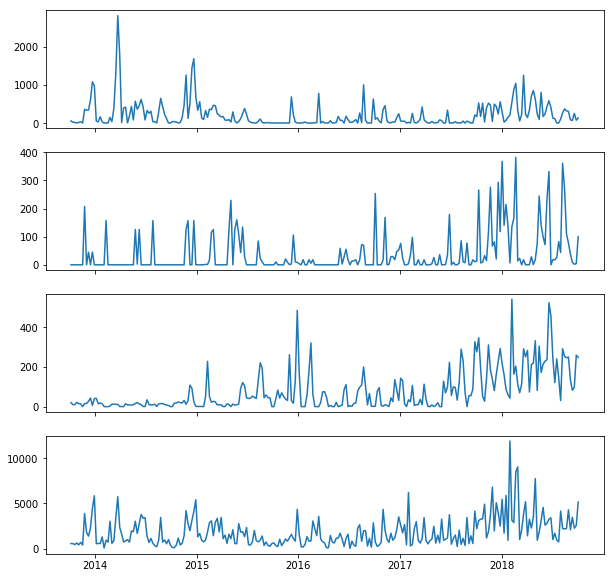

In [31]:
dimensions = (10,10)
fig, (ax1,ax2, ax3, ax4) = pyplot.subplots(4, figsize= dimensions, sharex='all')

ax1.plot(adspendnoproducts.index, adspendnoproducts['CABLE TV'])
ax2.plot(adspendnoproducts.index, adspendnoproducts['NEWSPAPER'])
ax3.plot(adspendnoproducts.index, adspendnoproducts['SPOT TV'])
ax4.plot(adspendnoproducts.index, adspendnoproducts['TOTAL'])

In [32]:
testdate = pd.to_datetime('2013-10-07')

In [33]:
testdate.weekday()

0

In [35]:
netflix = pd.read_csv('netflix.googletrends.csv', parse_dates= ['period'])

In [36]:
netflix.set_index('period', inplace = True)

In [37]:
netflix.head() #index set to date

,Unnamed: 0,date,value,onediffvalue
period,,,,
2013-10-07,0,Oct 07 2013,20421.869782,NaN
2013-10-08,1,Oct 08 2013,19434.148574,-987.721208
2013-10-09,2,Oct 09 2013,19697.352780,263.204206
2013-10-10,3,Oct 10 2013,19669.810502,-27.542278
2013-10-11,4,Oct 11 2013,20872.271329,1202.460828


In [38]:
netflixweekly = netflix.resample('W-MON', closed = 'left', label='left').mean()

In [39]:
netflixweekly.head()

,Unnamed: 0,value,onediffvalue
period,,,
2013-10-07,3,23016.904906,1423.757460
2013-10-14,10,22716.087023,-190.656801
2013-10-21,17,22174.909729,-58.551989
2013-10-28,24,21206.446664,231.895435
2013-11-04,31,21666.070240,43.007399


In [40]:
mergedweeklydata = adspendnoproducts.join(netflixweekly)

In [41]:
mergedweeklydata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL,Unnamed: 0,value,onediffvalue
FIXED TIME,,,,,,,,,,,,,,,
2013-10-07,54.6,0.0,0.0,0.0,0.0,222.9,0.0,0.0,19.8,0.0,263.2,560.5,3,23016.904906,1423.757460
2013-10-14,21.3,0.0,0.0,0.0,0.0,117.2,0.0,0.0,9.7,0.0,413.5,561.7,10,22716.087023,-190.656801
2013-10-21,14.1,0.0,0.0,0.0,0.0,145.8,0.0,0.0,10.3,0.0,279.1,449.3,17,22174.909729,-58.551989
2013-10-28,3.7,0.0,0.0,0.0,0.0,44.7,0.0,233.0,21.5,0.0,326.1,629.1,24,21206.446664,231.895435
2013-11-04,13.0,0.0,0.0,0.0,0.0,175.9,0.0,0.0,15.1,0.0,215.3,419.3,31,21666.070240,43.007399


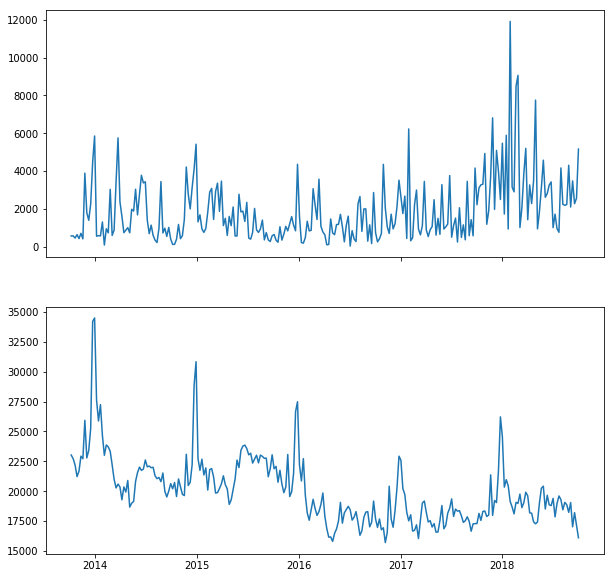

In [43]:
dimensions = (10,10)
fig, (ax1,ax2) = pyplot.subplots(2, figsize= dimensions, sharex='all')

ax1.plot(mergedweeklydata.index, mergedweeklydata['TOTAL'])
ax2.plot(mergedweeklydata.index, mergedweeklydata['value'])

In [44]:
mergedweeklydata['TOTAL'].corr(mergedweeklydata['value'])

0.07869191731914109

In [45]:
#data must be stationary to compare 
mergedweeklydata['TOTALdiff']= mergedweeklydata['TOTAL'].diff(1)
mergedweeklydata['valuediff'] = mergedweeklydata['value'].diff(1)

In [48]:
mergedweeklydata['TOTALdiff'].corr(mergedweeklydata['valuediff'])

0.17996636383056983

In [49]:
mergedweeklydata.to_csv('adspend.googletrands.weekly.csv')